In [ ]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# === Étape 2 : Fonction pour charger un fichier batch ===
def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
        X = data[b'data']  # images
        Y = data[b'labels']  # labels
        # Reformater les images : (N, 3, 32, 32) → (N, 32, 32, 3)
        X = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        Y = np.array(Y)
        return X, Y

# === Étape 3 : Fonction pour charger tous les fichiers de CIFAR-10 ===
def load_cifar10_data(data_dir):
    X_list = []
    Y_list = []

    # Charger les 5 fichiers d'entraînement
    for i in range(1, 6):
        file = os.path.join(data_dir, f'data_batch_{i}')
        X, Y = load_cifar_batch(file)
        X_list.append(X)
        Y_list.append(Y)

    # Concatenation des données
    X_train = np.concatenate(X_list)
    Y_train = np.concatenate(Y_list)

    # Charger le batch de test
    X_test, Y_test = load_cifar_batch(os.path.join(data_dir, 'test_batch'))

    return X_train, Y_train, X_test, Y_test

# === Étape 4 : Appliquer les fonctions pour charger les données ===
data_dir = './cifar-10-batches-py'  # chemin du dossier extrait
X_train, y_train, X_test, y_test = load_cifar10_data(data_dir)

# === Étape 5 : Affichage d'exemples d'images ===
labels_names = ['Avion', 'Voiture', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Classe : {labels_names[y_train[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
#Normalisation et encodage des labels
# Normaliser les pixels (entre 0 et 1)
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# One-hot encoding des étiquettes (pour softmax)
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)


In [ ]:
# Construction du modèle CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # pour éviter l'overfitting
    Dense(10, activation='softmax')  # 10 classes
])


In [ ]:
# Courbe de précision
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()
plt.show()

# Courbe de perte
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.legend()
plt.show()


In [ ]:
# Évaluation finale du modèle
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"✅ Accuracy finale sur les données de test : {acc:.2%}")


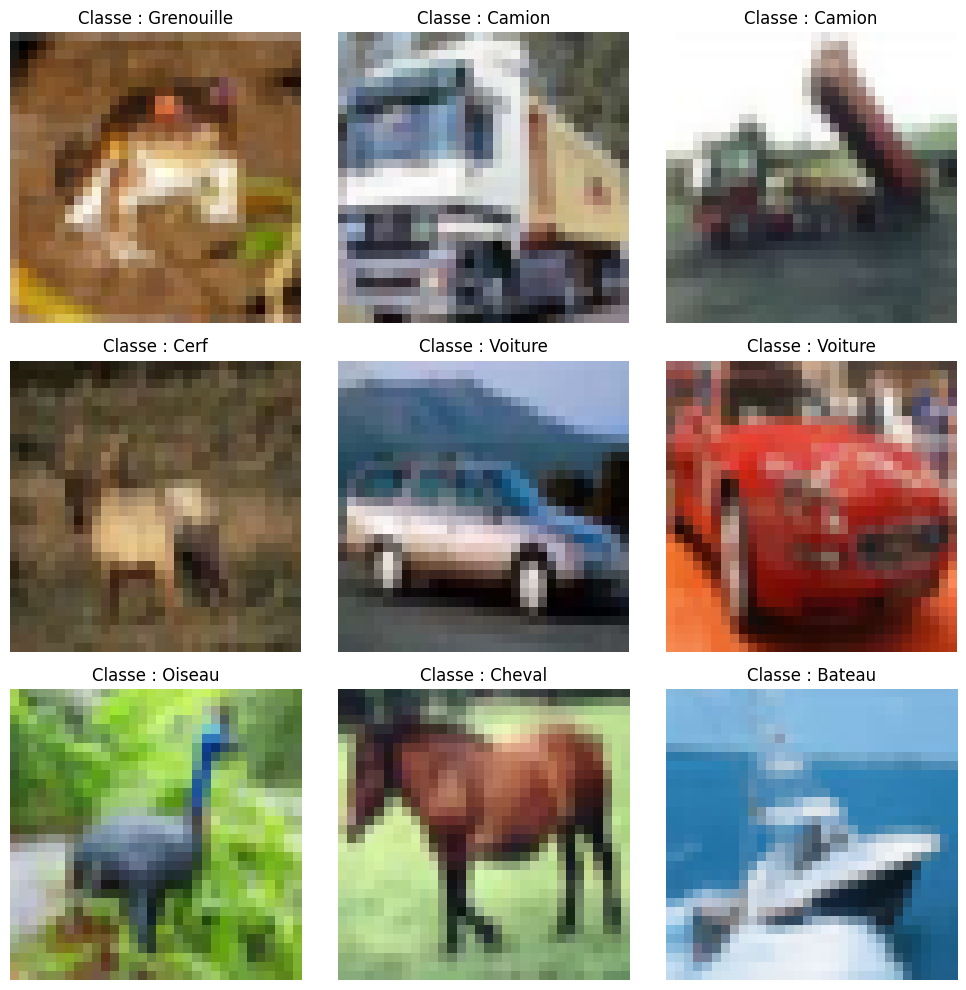

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.3087 - loss: 1.8830 - val_accuracy: 0.4891 - val_loss: 1.4072
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.4884 - loss: 1.4247 - val_accuracy: 0.5552 - val_loss: 1.2380
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.5451 - loss: 1.2776 - val_accuracy: 0.6001 - val_loss: 1.1309
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.5834 - loss: 1.1747 - val_accuracy: 0.6161 - val_loss: 1.0958
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6150 - loss: 1.0942 - val_accuracy: 0.6642 - val_loss: 0.9639
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6332 - loss: 1.0393 - val_accuracy: 0.6547 - val_loss: 0.9899
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6452 - loss: 1.0059 - val_accuracy: 0.6802 - val_loss: 0.9210
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6612 - loss: 0.9578 - 

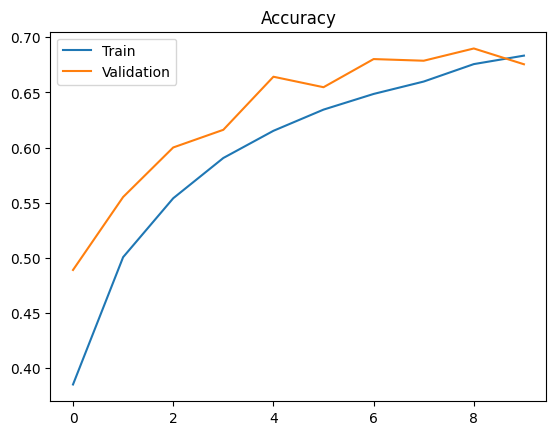

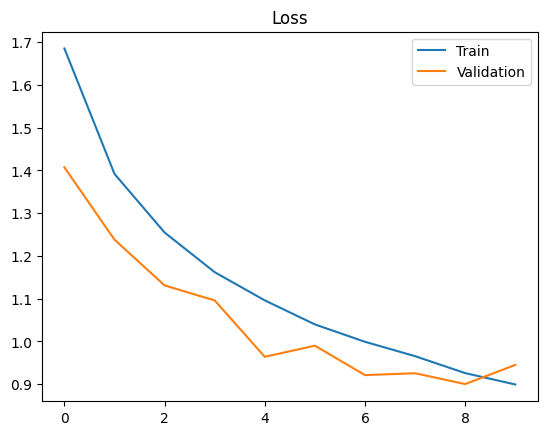

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6803 - loss: 0.9373


✅ Accuracy finale sur les données de test : 67.55%


In [11]:
# 📦 Import des bibliothèques
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# === Étape 1 : Fonction pour lire un fichier batch ===
def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
        X = data[b'data']
        Y = data[b'labels']
        X = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        Y = np.array(Y)
        return X, Y

# === Étape 2 : Charger tous les fichiers CIFAR-10 ===
def load_cifar10_data(data_dir):
    X_list = []
    Y_list = []

    for i in range(1, 6):
        file = os.path.join(data_dir, f'data_batch_{i}')
        X, Y = load_cifar_batch(file)
        X_list.append(X)
        Y_list.append(Y)

    X_train = np.concatenate(X_list)
    Y_train = np.concatenate(Y_list)

    X_test, Y_test = load_cifar_batch(os.path.join(data_dir, 'test_batch'))

    return X_train, Y_train, X_test, Y_test

# === Étape 3 : Charger les données ===
data_dir = './cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_cifar10_data(data_dir)

# === Étape 4 : Affichage d'exemples d'images ===
labels_names = ['Avion', 'Voiture', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Classe : {labels_names[y_train[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# === Étape 5 : Prétraitement ===
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# === Étape 6 : Construction du modèle CNN ===
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# === Étape 7 : Compilation et Entraînement ===
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test_cat),
    callbacks=[EarlyStopping(patience=3)]
)

# === Étape 8 : Visualisation des courbes ===
# Courbe de précision
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()
plt.show()

# Courbe de perte
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.legend()
plt.show()

# === Étape 9 : Évaluation finale ===
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"✅ Accuracy finale sur les données de test : {acc:.2%}")
model.save("mon_modele_cifar10.h5")

